In [1]:
import numpy as np
from scipy import stats, signal, fftpack
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fs = 100
dt = 600
t = np.linspace(0, dt, dt*fs+1)
wnp = 1e-16

In [3]:
e = np.random.randn(t.size)*wnp

In [4]:
xt = stats.norm(loc=20, scale=5).pdf(t)
xt.size

60001

In [5]:
gt = stats.lognorm(0.45, loc=-20, scale=100).pdf(t)
gt.size

60001

In [6]:
yt = signal.convolve(xt, gt, mode='full')
yt = yt[:t.size]/np.sum(yt[:t.size]/fs) + e
yt.size

60001

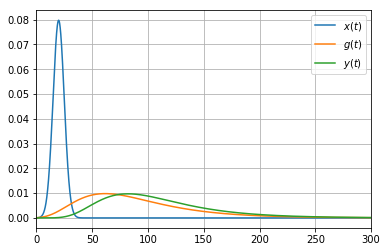

In [7]:
fig, axe = plt.subplots()
axe.plot(t, xt, label=r"$x(t)$")
axe.plot(t, gt, label=r"$g(t)$")
axe.plot(t, yt, label=r"$y(t)$")
axe.set_xlim([0,300])
axe.legend()
axe.grid()

In [8]:
Xs = fftpack.fft(xt)
Ys = fftpack.fft(yt)
fq = fs*fftpack.fftfreq(t.size)

In [9]:
N = fftpack.fft(e)

In [10]:
Gs = (np.conj(Xs)*Ys)/(Xs*np.conj(Xs) + 1e-1)

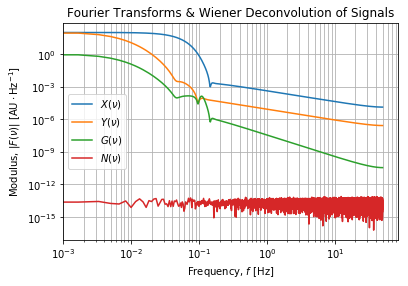

In [11]:
fig, axe = plt.subplots()
axe.loglog(fq[:t.size//2], np.abs(Xs)[:t.size//2], label=r"$X(\nu)$")
axe.loglog(fq[:t.size//2], np.abs(Ys)[:t.size//2], label=r"$Y(\nu)$")
axe.loglog(fq[:t.size//2], np.abs(Gs)[:t.size//2], label=r"$G(\nu)$")
axe.loglog(fq[:t.size//2], np.abs(N)[:t.size//2], label=r"$N(\nu)$")
axe.set_title("Fourier Transforms & Wiener Deconvolution of Signals")
axe.set_xlabel(r"Frequency, $f$ $[\mathrm{Hz}]$")
axe.set_ylabel(r"Modulus, $|F(\nu)|$ $[\mathrm{AU\cdot Hz^{-1}}]$")
axe.legend()
axe.grid(which='both')

In [12]:
gti = fftpack.ifft(Gs)

In [13]:
gti

array([4.66604748e-07-7.43647148e-21j, 4.69836536e-07+9.23676695e-21j,
       4.73077481e-07-7.76933715e-21j, ...,
       4.57397619e-07-1.13826097e-20j, 4.60456336e-07-2.12323663e-20j,
       4.63525380e-07+1.45565991e-20j])

In [14]:
np.allclose(np.imag(gti), 0)

True

In [15]:
gti = np.real(gti)

In [16]:
gti = gti/(gti.sum()/fs)

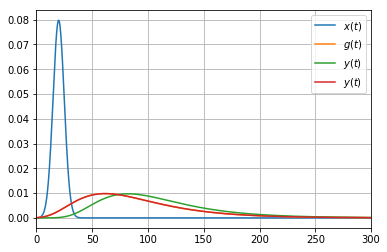

In [17]:
fig, axe = plt.subplots()
axe.plot(t, xt, label=r"$x(t)$")
axe.plot(t, gt, label=r"$g(t)$")
axe.plot(t, yt, label=r"$y(t)$")
axe.plot(t, gti, label=r"$y(t)$")
axe.set_xlim([0,300])
axe.legend()
axe.grid()

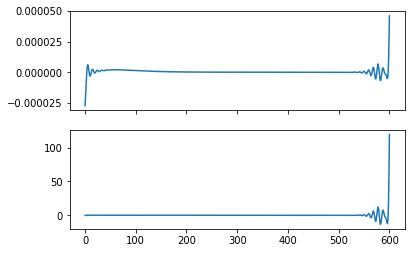

In [18]:
fig, axe = plt.subplots(2, 1, sharex=True)
axe[0].plot(t, gti-gt)
axe[1].plot(t, (gti-gt)/gt)

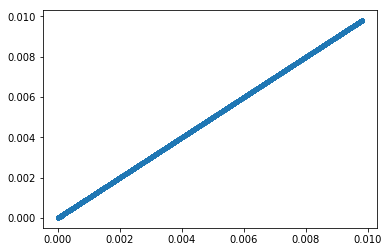

In [19]:
fig, axe = plt.subplots()
axe.plot(gt, gti, '.')